# Evaluation of Multi-Tier Framework for measuring access to electricity 

### Importing the useful libraries

In [1145]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import pie, axis, show
import seaborn as sns
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings("ignore")

### Importing the dataset

In [1146]:
df = pd.read_csv('Main_dataset.csv')

In [1147]:
df.head()

,Unnamed: 0,HHID,Cluster,strata,Province,District,Sector,Cellule,Village,B1,...,T28,T28B,T28C,DATE_START,TIME_START,DATE_END,TIME_END,cluster,sample_weight,Locality
0,0,1.102021e+12,1,11,City of Kigali,Nyarugenge,Kanyinya,Nzove,Ruyenzi,2.0,...,NaN,NaN,NaN,18/11/2016,12:05,18/11/2016,12:49,11,476.61765,Rural
1,1,1.102021e+12,1,12,City of Kigali,Nyarugenge,Kanyinya,Nzove,Ruyenzi,1.0,...,NaN,NaN,NaN,18/11/2016,10:23,18/11/2016,11:26,12,370.04202,Rural
2,2,1.102021e+12,1,12,City of Kigali,Nyarugenge,Kanyinya,Nzove,Ruyenzi,1.0,...,NaN,NaN,NaN,18/11/2016,11:32,18/11/2016,12:24,12,370.04202,Rural
3,3,1.102021e+12,1,12,City of Kigali,Nyarugenge,Kanyinya,Nzove,Ruyenzi,1.0,...,NaN,NaN,NaN,18/11/2016,10:30,18/11/2016,11:17,12,370.04202,Rural
4,4,1.102021e+12,1,12,City of Kigali,Nyarugenge,Kanyinya,Nzove,Ruyenzi,1.0,...,No,NaN,NaN,18/11/2016,10:14,18/11/2016,11:28,12,370.04202,Rural


### Downloading csv file from dta format

df.to_csv("Main_dataset.csv")

## Selecting the features for analysis

## 1. Attribute: Capacity

In [1148]:
df_cap= df[['C22']]

In [1149]:
df_cap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3295 entries, 0 to 3294
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   C22     1478 non-null   float64
dtypes: float64(1)
memory usage: 25.9 KB


### Printing the new dataset

In [1150]:
df_cap.tail()

,C22
3290,NaN
3291,4.65
3292,6.05
3293,4.65
3294,NaN


### Replacing NaN values with "12345" (random number) 

This is done to keep the missing values into analysis (As it is important to know how many missing values do we have)

In [1151]:
df_cap["C22"].fillna(12345, inplace = True) 

In [1152]:
df_cap.head()

,C22
0,12345.0
1,12345.0
2,12345.0
3,12345.0
4,12345.0


In [1153]:
df_cap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3295 entries, 0 to 3294
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   C22     3295 non-null   float64
dtypes: float64(1)
memory usage: 25.9 KB


### Adding column "TIER" to the dataset with respect to household's power consumption

In [1154]:
def conditions(C22):
    if C22 ==12345:
        return "Missing_data"
    elif C22<3:
        return "0"
    elif 3<C22<50:
        return "1"
    elif 50<C22<200:
        return "2"
    elif 200<C22<800:
        return "3"
    elif 800<C22<2000:
        return "4"
    else:
        return "5"
    
func = np.vectorize(conditions)
transform = func(df_cap.C22)
df_cap["TIER"] = transform

In [1155]:
df_cap.head()

,C22,TIER
0,12345.0,Missing_data
1,12345.0,Missing_data
2,12345.0,Missing_data
3,12345.0,Missing_data
4,12345.0,Missing_data


### Printing the TIER counts

In [1156]:
df_cap['TIER'].value_counts()

Missing_data    1817
1               1227
0                143
2                103
3                  5
Name: TIER, dtype: int64

### Visualizing the TIER levels 

Text(0.5, 1.0, 'TIER levels based on power capacity')

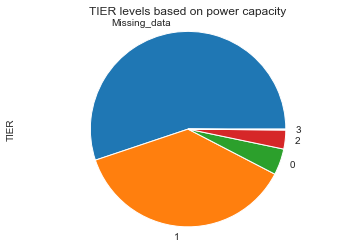

In [1157]:
df_cap.TIER.value_counts().plot(kind='pie')
plt.axis('equal')
plt.title('TIER levels based on power capacity')

## 2. Attribute: Availabilty

Methodology:

To understand the attribute more carefully, two columns have been taekn into consideration, C26A and C26B; 
* C26A represents the hours of electricity available each day and night from the grid in the worst months. 
* Whereas, C26B represents the hours of electricity available each day and nightfrom the grid in the actual months.

In [1158]:
df_av= df[['C26A','C26B']]

In [1159]:
df_av.tail()

,C26A,C26B
3290,NaN,NaN
3291,13.0,18.0
3292,19.0,24.0
3293,NaN,23.0
3294,NaN,NaN


In [1160]:
df_av.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3295 entries, 0 to 3294
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   C26A    652 non-null    object
 1   C26B    1591 non-null   object
dtypes: object(2)
memory usage: 51.6+ KB


## Calculation

In this step a new column "C26A_new" hasbeen formed. For this column, the values from column "C26A, worst months" has been taken as the main source of analysis and any missing information (missing value of a household) for this column has been taken from the column "C26B, actual months". This is done because the world bank group considers worst situation for analysis. 

In [1161]:
df_av['C26A_new'] = df_av.C26A.fillna(value=df_av.C26B)

In [1162]:
df_av.tail()

,C26A,C26B,C26A_new
3290,NaN,NaN,NaN
3291,13.0,18.0,13.0
3292,19.0,24.0,19.0
3293,NaN,23.0,23.0
3294,NaN,NaN,NaN


In [1163]:
df_av.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3295 entries, 0 to 3294
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   C26A      652 non-null    object
 1   C26B      1591 non-null   object
 2   C26A_new  1591 non-null   object
dtypes: object(3)
memory usage: 77.4+ KB


### Replacing NaN values with "12345" (random number) 

This is done to keep the missing values into analysis (As it is important to know how many missing values do we have)

In [1164]:
df_av["C26A_new"].fillna(12345, inplace = True) 

In [1165]:
df_av.tail()

,C26A,C26B,C26A_new
3290,NaN,NaN,12345
3291,13.0,18.0,13.0
3292,19.0,24.0,19.0
3293,NaN,23.0,23.0
3294,NaN,NaN,12345


In [1166]:
df_av=df_av.replace(to_replace="Don't know",value=12345)

In [1167]:
df_av.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3295 entries, 0 to 3294
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   C26A      652 non-null    object
 1   C26B      1591 non-null   object
 2   C26A_new  3295 non-null   object
dtypes: object(3)
memory usage: 77.4+ KB


### Converting coulmn C26A_new from Dtype: Object to Dtype: Float

In [1168]:
df_av["C26A_new"] = pd.to_numeric(df_av["C26A_new"])

### Adding column "AVAILABILITY" to the dataset with respect to household's daily consumption

In [1169]:
# AVAILABILITY
#Note: conditions for TIER 1 and 2 are the same

def conditions(C26A_new):
    if C26A_new ==12345:
        return "Missing_data"
    elif C26A_new<4:
        return "0"
    elif 4<C26A_new<8:
        return "1&2"
    elif 8<C26A_new<16:
        return "3"
    elif 16<C26A_new<23:
        return "4"
    else:
        return "5"
    
func = np.vectorize(conditions)
transform = func(df_av.C26A_new)
df_av["AVAILABILITY"] = transform

In [1170]:
df_av.tail()

,C26A,C26B,C26A_new,AVAILABILITY
3290,NaN,NaN,12345.0,Missing_data
3291,13.0,18.0,13.0,3
3292,19.0,24.0,19.0,4
3293,NaN,23.0,23.0,5
3294,NaN,NaN,12345.0,Missing_data


In [1171]:
df_av['AVAILABILITY'].value_counts()

Missing_data    1893
4                572
5                530
3                184
0                 60
1&2               56
Name: AVAILABILITY, dtype: int64

### Visualizing the TIER levels 

Text(0.5, 1.0, 'TIER levels based on electricity availability')

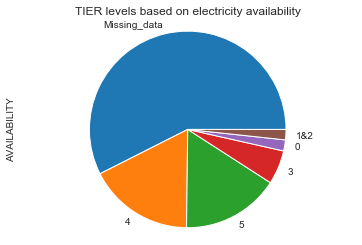

In [1172]:
df_av.AVAILABILITY.value_counts().plot(kind='pie')
plt.axis('equal')
plt.title('TIER levels based on electricity availability')